In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import  numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('D:/Internship/dataset/symptoms.csv')
df[:10]

,Dry Cough,High Fever,Sore Throat,Difficulty in breathing,Infected with Covid19
0,0,2,3,0,0
1,15,15,20,16,1
2,4,5,0,0,0
3,4,7,9,10,0
4,0,0,1,0,0
5,6,0,6,0,0
6,16,17,18,16,1
7,17,17,0,0,1
8,0,18,0,18,1
9,16,15,18,20,1


In [6]:
df.head()

,Dry Cough,High Fever,Sore Throat,Difficulty in breathing,Infected with Covid19
0,0,2,3,0,0
1,15,15,20,16,1
2,4,5,0,0,0
3,4,7,9,10,0
4,0,0,1,0,0


In [7]:
df.describe()

,Dry Cough,High Fever,Sore Throat,Difficulty in breathing,Infected with Covid19
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,9.145833,8.208333,7.145833,5.708333,0.500000
std,7.525813,7.537024,8.021221,7.701777,0.505291
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,8.000000,2.500000,0.000000,0.500000
75%,16.000000,16.000000,16.250000,13.750000,1.000000
max,20.000000,20.000000,20.000000,20.000000,1.000000


In [8]:
labels = np.array(df['Infected with Covid19'])
labels

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1], dtype=int64)

In [9]:
feature = df.drop('Infected with Covid19', axis=1)
feature[:5]

,Dry Cough,High Fever,Sore Throat,Difficulty in breathing
0,0,2,3,0
1,15,15,20,16
2,4,5,0,0
3,4,7,9,10
4,0,0,1,0


In [10]:
feature = np.array(feature)
feature[:5]

array([[ 0,  2,  3,  0],
       [15, 15, 20, 16],
       [ 4,  5,  0,  0],
       [ 4,  7,  9, 10],
       [ 0,  0,  1,  0]], dtype=int64)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(feature, labels, test_size=0.3, random_state=42)

In [12]:
print("Training data", X_train.shape)
print("Testing data",X_test.shape)

Training data (33, 4)
Testing data (15, 4)


In [25]:
rf = RandomForestClassifier(n_estimators=1000, random_state=10)

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [27]:
prediction = rf.predict(X_test)
prediction

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [28]:
print("Predicted data: ", prediction)
print("Actual data: ", y_test)

Predicted data:  [1 0 0 0 1 1 0 1 0 1 1 0 1 1 0]
Actual data:  [1 0 0 0 0 1 0 1 0 1 1 0 1 1 0]


In [31]:
predictions = rf.predict_proba([[15,15,20,16]])
predictions * 100

array([[ 0.5, 99.5]])

In [18]:
import pickle

In [32]:
file = open('RF48.pkl', 'wb')
pickle.dump(rf, file)
file.close()

<BarContainer object of 15 artists>

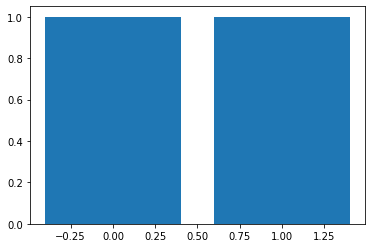

In [30]:
plt.bar(y_test, prediction )

In [34]:
acc = accuracy_score(prediction, y_test)
acc

0.9333333333333333